<a href="https://colab.research.google.com/github/simingg/BT4014/blob/main/04_Recommending_Categories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data

In [ ]:
# df = pd.read_csv('../Data/events_cleaned_1.csv')
# os.chdir('../Results/Reward Distribution 1')

# df = pd.read_csv('../Data/events_cleaned_2.csv')
# os.chdir('../Results/Reward Distribution 2')

df = pd.read_csv('../Data/events_cleaned_3.csv')
os.chdir('../Results/Reward Distribution 3')

df.head()

,electronics,computers,construction,auto,appliances,stationery,furniture,kids,accessories,country_yard,apparel,medicine,sport,jewelry
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# results = pd.read_csv('Epsilon-Greedy/eg_results.csv')
# results = pd.read_csv('Epsilon-Decay/ed_results.csv')
# results = pd.read_csv('Softmax/sm_results.csv')
# results = pd.read_csv('Annealing Softmax/asm_results.csv')
# results = pd.read_csv('UCB1/ucb1_results.csv')
# results = pd.read_csv('Bayesian UCB/bucb_results.csv')
results = pd.read_csv('Thompson Sampling/thomp_results.csv')

results.head()

,n_sim,n_step,chosen_arm,rewards,cumulative_rewards,type
0,1.0,1.0,0.0,0.0,0.0,thomp_sampling
1,1.0,2.0,6.0,0.0,0.0,thomp_sampling
2,1.0,3.0,8.0,0.0,0.0,thomp_sampling
3,1.0,4.0,2.0,0.0,0.0,thomp_sampling
4,1.0,5.0,12.0,0.0,0.0,thomp_sampling


# 2. Compute Average Chosen Category Count

In [ ]:
# count number of times (out of 100) each arm was chosen in each step
results = results.groupby(['type', 'chosen_arm', 'n_step']).size()
results = results.to_frame(name='count').reset_index()
results.head()

,type,chosen_arm,n_step,count
0,thomp_sampling,0.0,1.0,12
1,thomp_sampling,0.0,2.0,7
2,thomp_sampling,0.0,3.0,7
3,thomp_sampling,0.0,4.0,4
4,thomp_sampling,0.0,5.0,7


In [ ]:
# compute average number of times each arm was chosen
results = results.groupby('chosen_arm', as_index=False).agg({'count':'mean'})
# results['count'] = results['count'].map(lambda x: round(x)) # to nearest integer
results = results.rename(columns={'count': 'avg_count'})
results

,chosen_arm,avg_count
0,0.0,2.302880
1,1.0,95.014960
2,2.0,1.956988
3,3.0,1.971497
4,4.0,1.913389
5,5.0,2.000824
6,6.0,1.967634
7,7.0,1.937767
8,8.0,1.942741
9,9.0,1.935025


In [ ]:
# map arm index to category
results['category'] = df.columns
results

,chosen_arm,avg_count,category
0,0.0,2.302880,electronics
1,1.0,95.014960,computers
2,2.0,1.956988,construction
3,3.0,1.971497,auto
4,4.0,1.913389,appliances
5,5.0,2.000824,stationery
6,6.0,1.967634,furniture
7,7.0,1.937767,kids
8,8.0,1.942741,accessories
9,9.0,1.935025,country_yard


# 3. Recommend Top 5 Chosen Categories

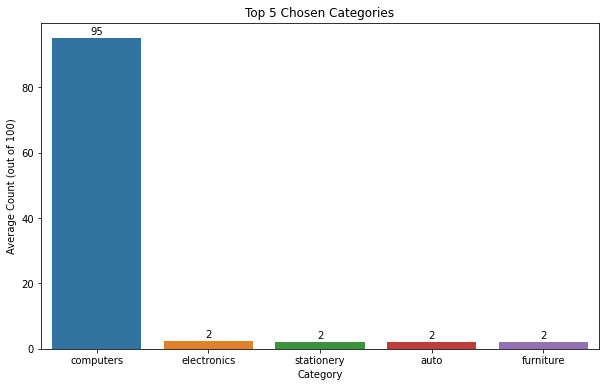

In [ ]:
# plot
plt.figure(figsize=(10,6))
ax = sns.barplot(x='category', y='avg_count', data=results.nlargest(5, 'avg_count'), order=results.nlargest(5, 'avg_count').sort_values('avg_count', ascending=False)['category'])
ax.set_title('Top 5 Chosen Categories')
ax.set_xlabel('Category')
ax.set_ylabel('Average Count (out of 100)')

# label
labels = results.nlargest(5, 'avg_count')['avg_count'].sort_values(ascending=False).tolist()
rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+0.5, round(label), ha='center', va='bottom')

plt.savefig('top_chosen_categories.png', dpi=300)
plt.show()